In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras

In [7]:
from keras.models import Sequential

In [8]:
from keras.layers import Dense

In [9]:
from keras.layers import LSTM

In [10]:
from keras.layers import Dropout

In [11]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")


In [12]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [13]:
training_set=dataset_train.iloc[:,1:2].values
#convert into numpy array of 1258 

In [14]:
training_set #numpy array of 1 D array

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [15]:
sc=MinMaxScaler()


In [16]:
training_set=sc.fit_transform(training_set)


In [17]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
training_set.shape

(1258, 1)

# Creating a Data Strucutre with 60 timesteps and 1 output

In [19]:
X_train=[] #At each financial day predict 60 previous stock prices before that finanacial day t

In [20]:
y_train=[] #stock price of next financial day t+1

In [21]:
for i in range(60,1258):
    X_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])

In [22]:
X_train,y_train=np.array(X_train),np.array(y_train)
#X_train are the inputs to the neural network

In [23]:
type(X_train)


numpy.ndarray

In [24]:
type(y_train)

numpy.ndarray

# Reshaping

In [25]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [26]:
X_train.shape
#1 dimension = Number of stock prices 
#2nd dimension = Number of time steps
#3rd dimension = Number of indecators

(1198, 60, 1)

In [27]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [28]:
from keras.models import Sequential

In [29]:
from keras.layers import Dense

In [30]:
from keras.layers import LSTM

In [31]:
from keras.layers import Dropout

# Initialising the RNN

In [32]:
regressor=Sequential()

# Adding first LSTM layer with some dropout regularistion

In [33]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [34]:
regressor.add(Dropout(0.2))

# Adding second LSTM layer with some dropout regularistion

In [35]:
regressor.add(LSTM(units=50,return_sequences=True))

In [36]:
regressor.add(Dropout(0.2))

# Adding third LSTM layer with some dropout regularistion

In [37]:
regressor.add(LSTM(units=50,return_sequences=True))

In [38]:
regressor.add(Dropout(0.2))

# Adding Fourth LSTM layer with some dropout regularistion

In [39]:
regressor.add(LSTM(units=50))

In [40]:
regressor.add(Dropout(0.2))

# Adding the output Layer

In [41]:
regressor.add(Dense(units=1))

# Compiling the RNN

In [42]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the RNN to the training set

In [43]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 50ms/step - loss: 0.0355
Epoch 2/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0051
Epoch 13/100
38/38 [=====

In [44]:
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [45]:
real_stock_price=dataset_test.iloc[:,1:2].values

# Getting the predicted stock price of 2017

In [46]:
dataset_total=pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0)

In [47]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [48]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

# Reshape to make data in a single column

In [49]:
inputs=inputs.reshape(-1,1)

In [50]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [51]:
inputs=sc.transform(inputs)

In [52]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [62]:
X_test=[] #At each financial day predict 60 previous stock prices before that finanacial day t

In [63]:
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [64]:
X_test=np.array(X_test)
#X_train are the inputs to the neural network

In [68]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [69]:
predicted_stock_price=regressor.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [70]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

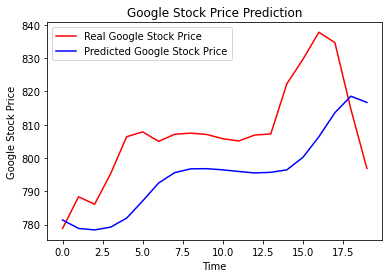

In [77]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()